In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [3]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [4]:
DATA_TRAIN_PATH = '/home/datasets/merc-2017/train/'
DATA_TEST_PATH = '/home/datasets/merc-2017/test/'

subfolders = ['audio', 'eyes', 'face_nn', 'kinect']

---

In [7]:
f_videos_train = glob(os.path.join(DATA_TRAIN_PATH, 'labels', '*.csv'))
print len(f_videos_train)

f_videos_test = glob(os.path.join(DATA_TEST_PATH, 'prediction', '*.csv'))
print len(f_videos_test)

312
143


In [10]:
stat = {}
for subf in subfolders:
    stat[subf] = 0

for f in log_progress(f_videos_train):
    for subf in subfolders:
        f_video = os.path.join(DATA_TRAIN_PATH, subf, os.path.basename(f))
        if not os.path.exists(f_video):
#             print 'no \'{}\' video for \'{}\''.format(os.path.basename(f), subf)
            stat[subf] += 1
        
#         break
        
#     break

for k, v in stat.iteritems():
    print '{} for {}'.format(v, k)

VBox(children=(HTML(value=u''), IntProgress(value=0, max=312)))

17 for kinect
6 for eyes
40 for audio
56 for face_nn


In [11]:
f_videos_train_union = []

for subf in subfolders:
    f_videos_train_union += os.listdir(os.path.join(DATA_TRAIN_PATH, subf))
f_videos_train_union = set(f_videos_train_union)
    
print len(f_videos_train_union)

306


In [12]:
stat = {}
for subf in subfolders:
    stat[subf] = 0

for f in log_progress(f_videos_train_union):
    for subf in subfolders:
        if not os.path.exists(os.path.join(DATA_TRAIN_PATH, subf, f)):
#             print 'no \'{}\' video for \'{}\''.format(f, subf)
            stat[subf] += 1
        
#         break
        
#     break

for k, v in stat.iteritems():
    print '{} for {}'.format(v, k)

VBox(children=(HTML(value=u''), IntProgress(value=0, max=306)))

11 for kinect
0 for eyes
34 for audio
50 for face_nn


In [13]:
print set([os.path.basename(f) for f in f_videos_train]) - f_videos_train_union

set(['ide0f7ee2a.csv', 'id8d0a8441.csv', 'idec2dfd14.csv', 'idd71251f6.csv', 'id7ce6e2bd.csv', 'ida5a773a8.csv'])


---

In [39]:
for subf in subfolders + ['labels']:
    print subf
    stat = []
    
    tmp_files = sorted(glob(os.path.join(DATA_TRAIN_PATH, subf, '*.csv')))
    for f in log_progress(tmp_files):
        tmp_df = pd.read_csv(f, skiprows=1)
        tmp = round(tmp_df.iloc[:, 0].diff().as_matrix()[1:].min(), 3)
        stat.append(tmp)
#         break
    stat = np.asarray(stat)
    print stat.min(), stat.max()

#     plt.figure(figsize=(15, 5))
#     plt.hist(stat)
#     plt.grid(True)
    print '-----------------------------'; print
    
#     break

audio


VBox(children=(HTML(value=u''), IntProgress(value=0, max=272)))

0.01 0.01
-----------------------------

eyes


VBox(children=(HTML(value=u''), IntProgress(value=0, max=306)))

0.02 0.04
-----------------------------

face_nn


VBox(children=(HTML(value=u''), IntProgress(value=0, max=256)))

0.02 0.04
-----------------------------

kinect


VBox(children=(HTML(value=u''), IntProgress(value=0, max=295)))

0.067 0.067
-----------------------------

labels


VBox(children=(HTML(value=u''), IntProgress(value=0, max=312)))

0.01 0.01
-----------------------------



---

In [5]:
X = np.load('tmp_X.npy')
print len(X)

306


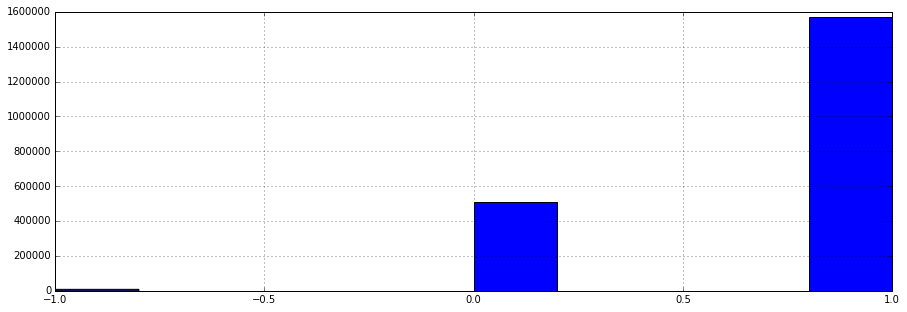

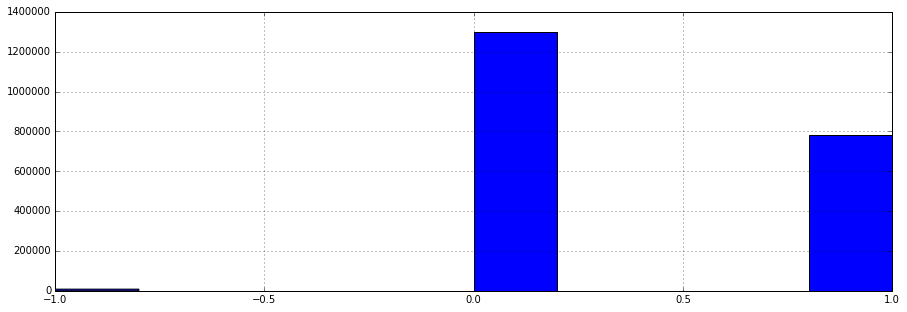

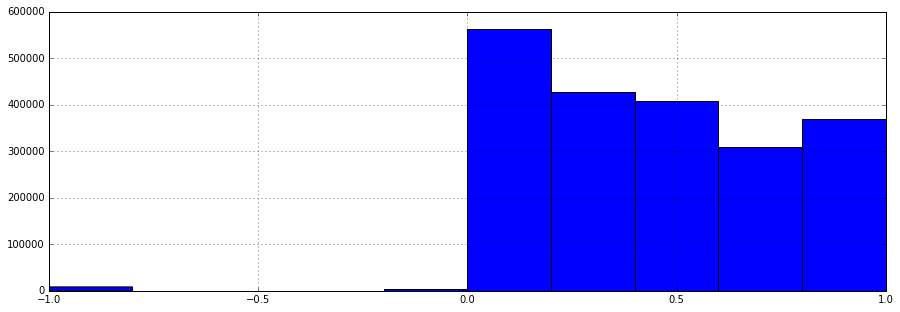

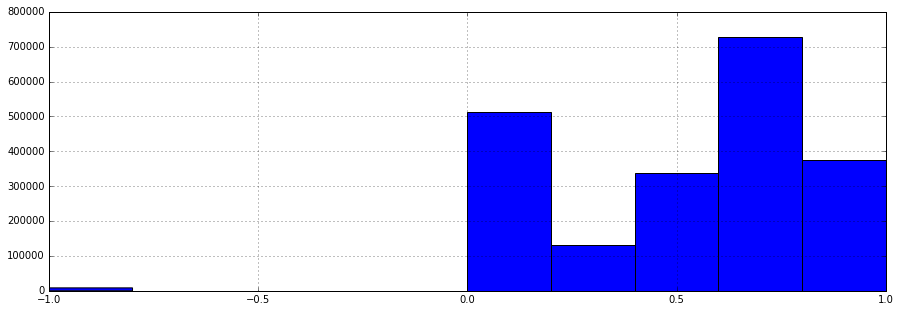

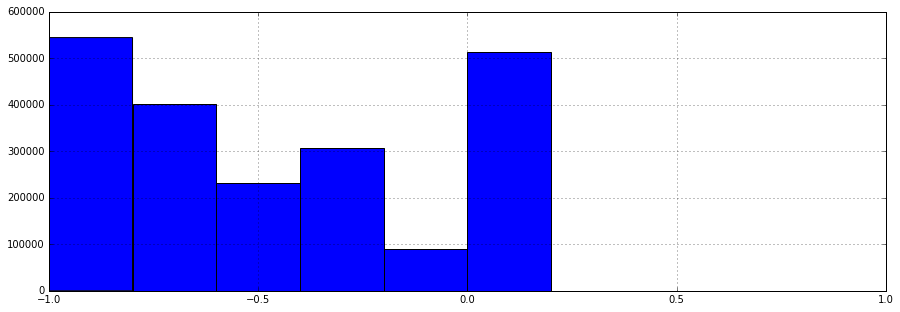

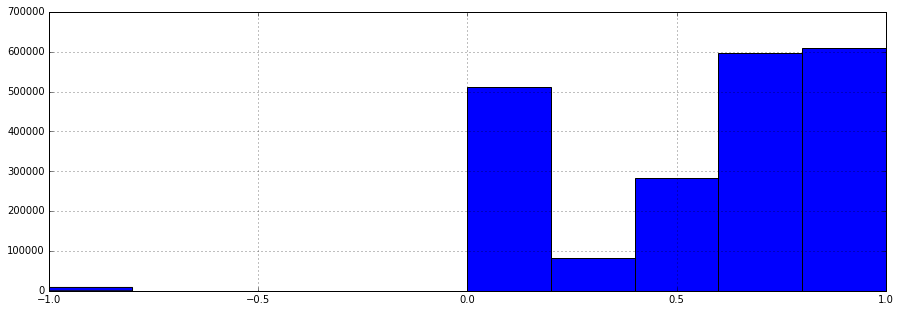

In [8]:
feats = np.concatenate([x['eyes'] for x in X])

for i in range(6):
    plt.figure(figsize=(15, 5))
    plt.hist(feats[:, :, i].flatten())
    plt.grid(True)

-1.0 1.28093870224
-1.0 0.867218667142
-1.0 1.06447362763
-1.0 0.644401239128
-1.0 0.415369051455
-1.0 0.507989063641
-1.0 0.251081183618
-3.2998473524 4.63555690047
-3.31424914057 4.94677755282
-3.24862194368 2.72112706656
-2.85251430805 1.84589074003
-4.00771257796 2.47920349623
-9.62255733217 1.24788708769
-3.62576099584 2.79853547594
-9.60448824609 1.20190079315
-7.32655828631 1.37995300004
-9.60683758374 1.21366258925
-9.65437352646 1.25812759172
-3.74723307313 2.93086957917
-9.76589868153 1.17766755986
-7.23461466432 1.4249450937
-9.60301595982 1.25091734472
-9.4204834715 1.39872315465
-9.58480104634 1.51105161852
-9.47275017064 1.68388863177
-9.54606474472 1.56067558477
-2.79223793068 0.564840107679


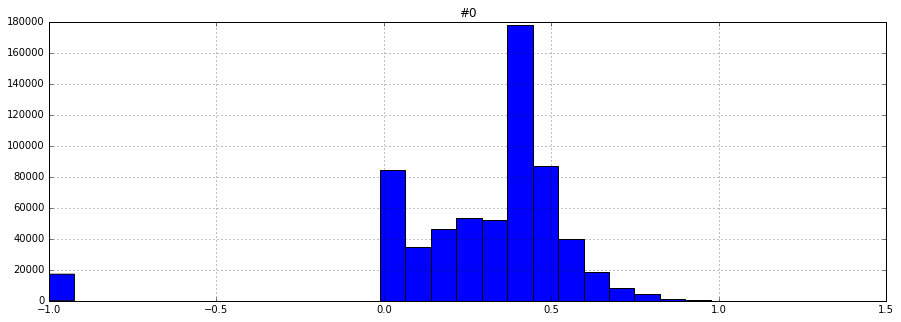

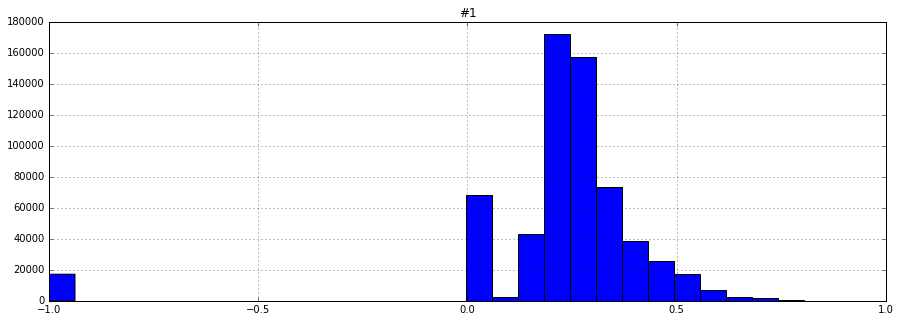

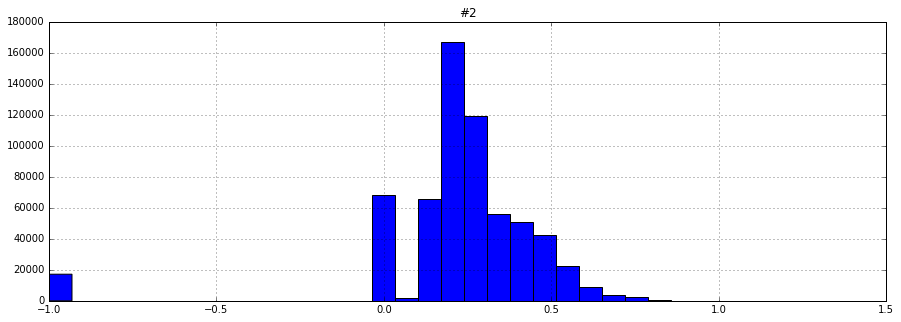

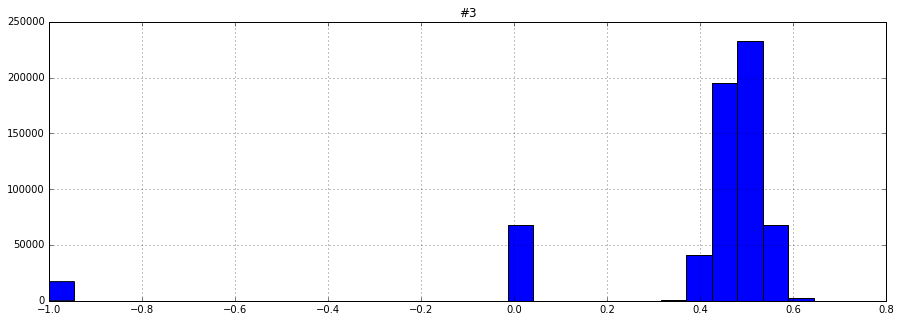

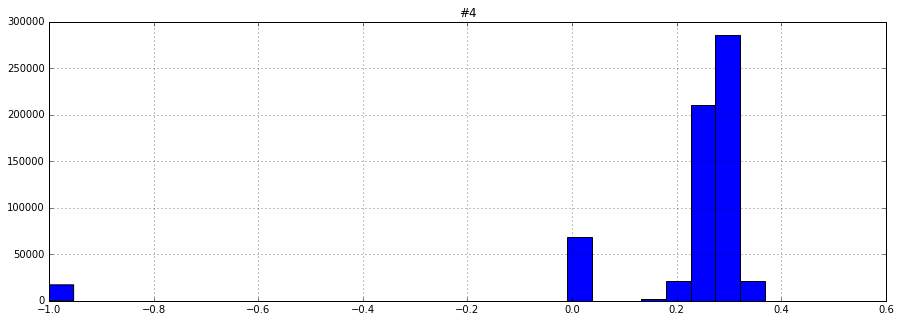

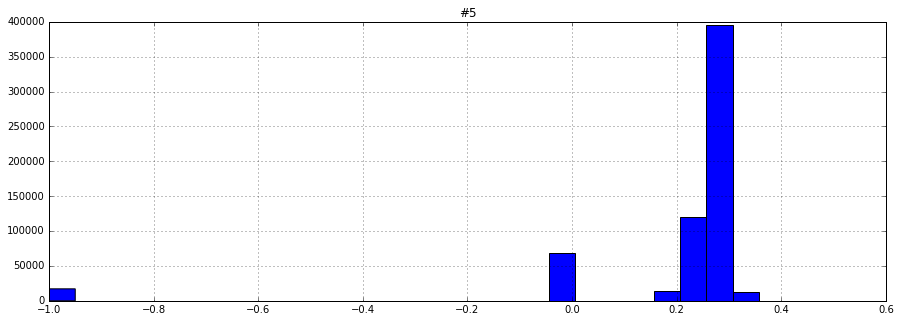

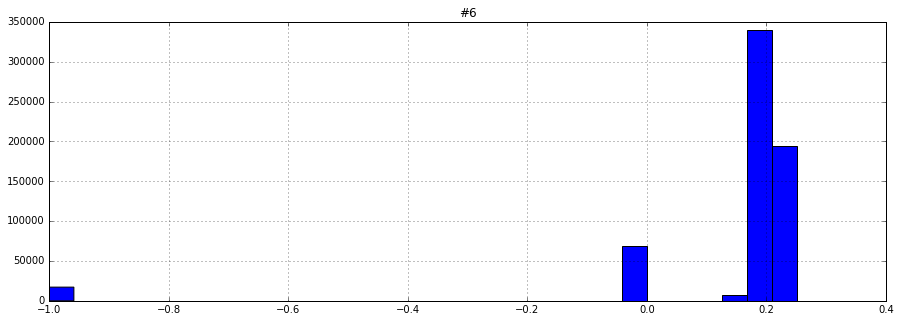

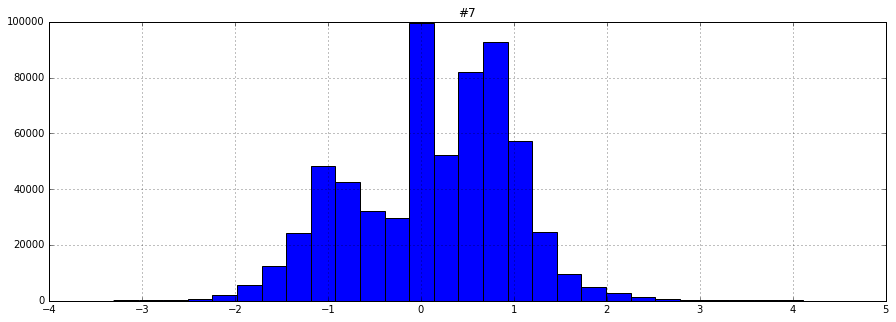

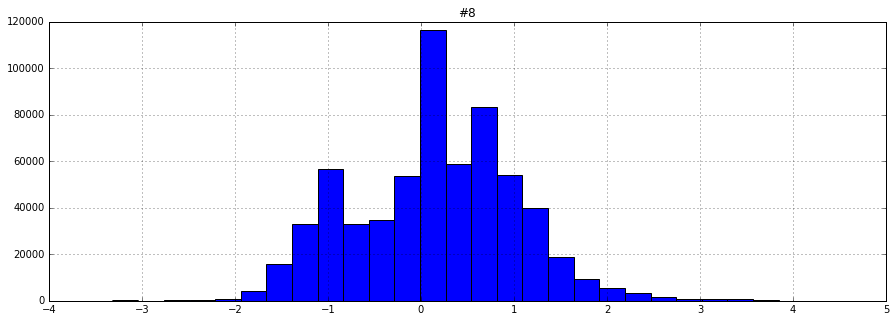

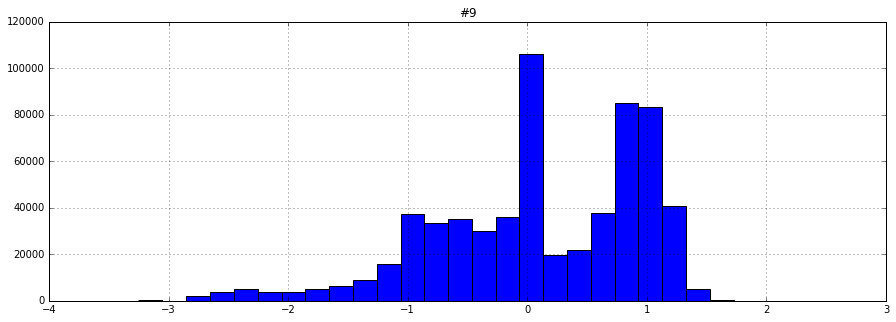

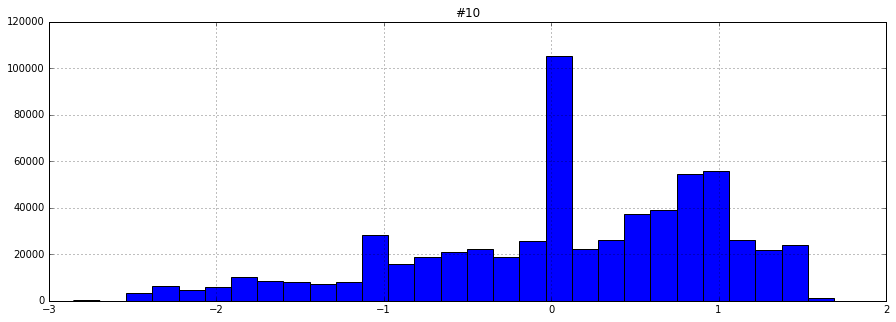

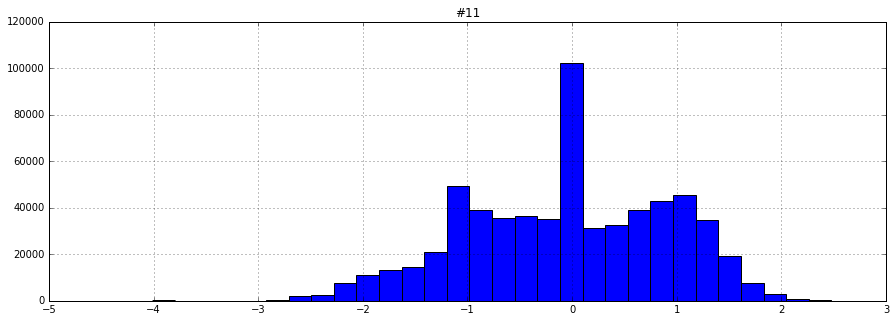

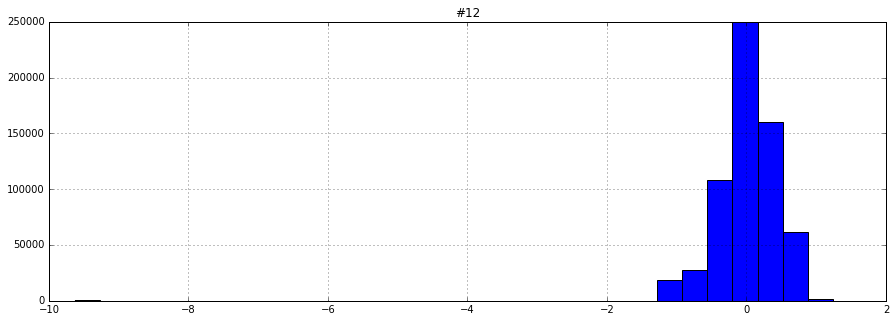

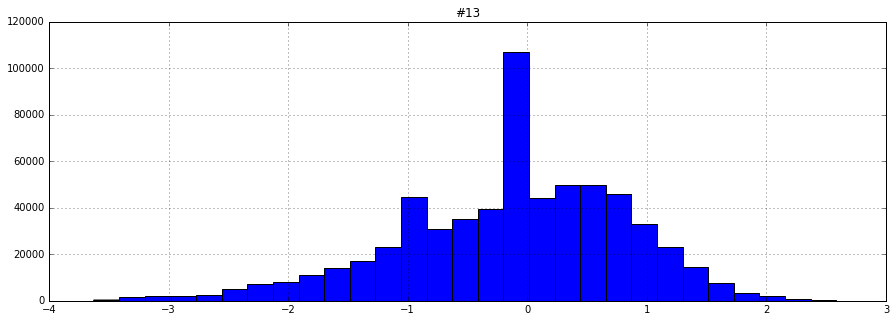

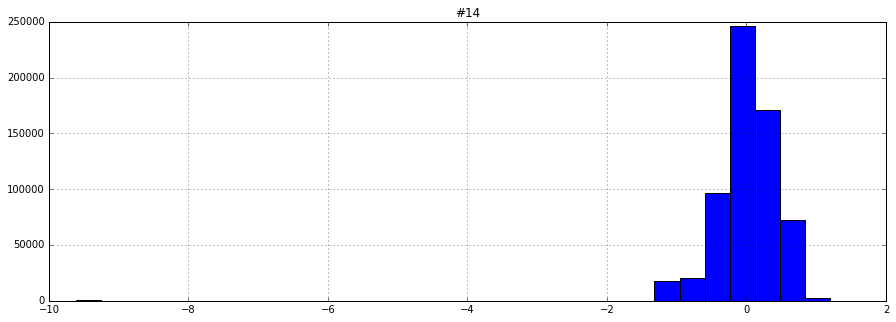

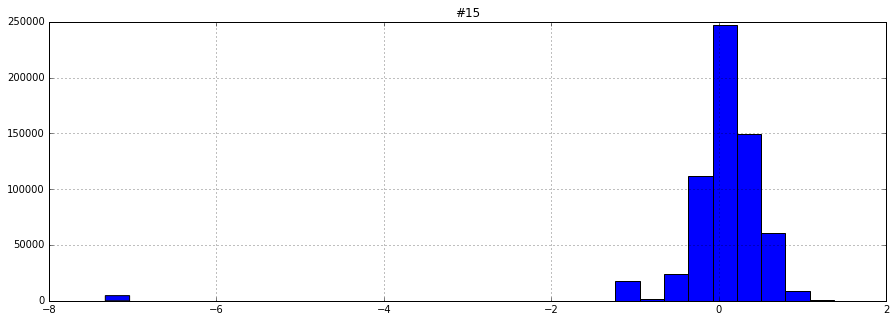

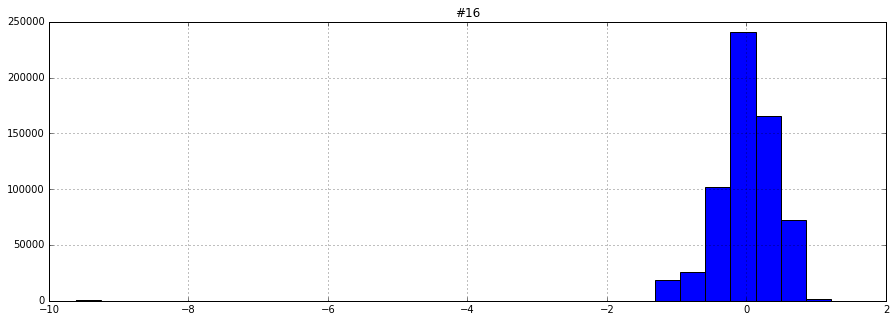

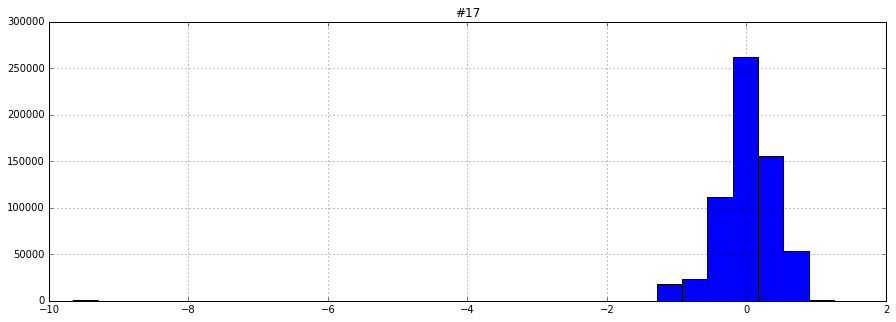

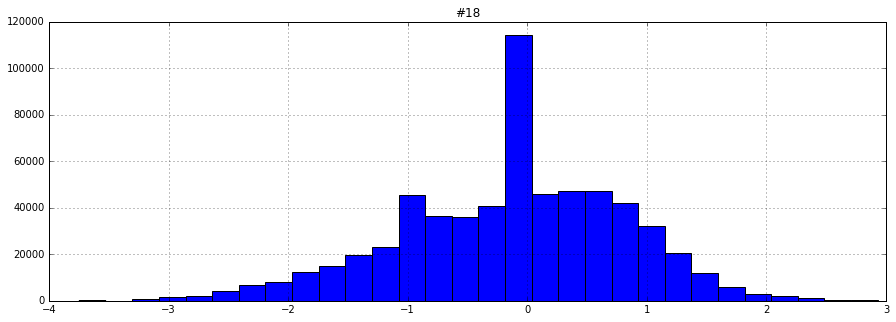

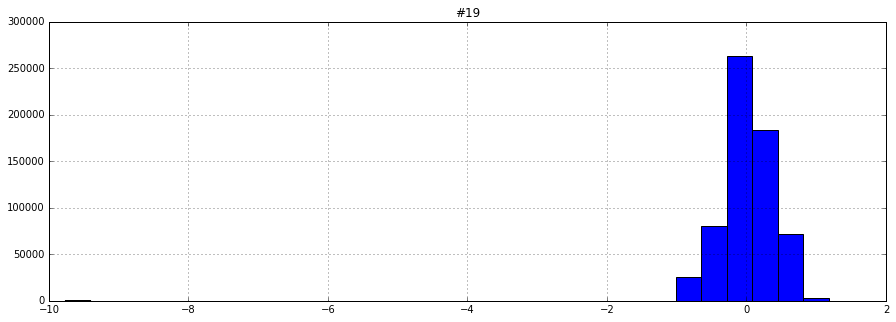

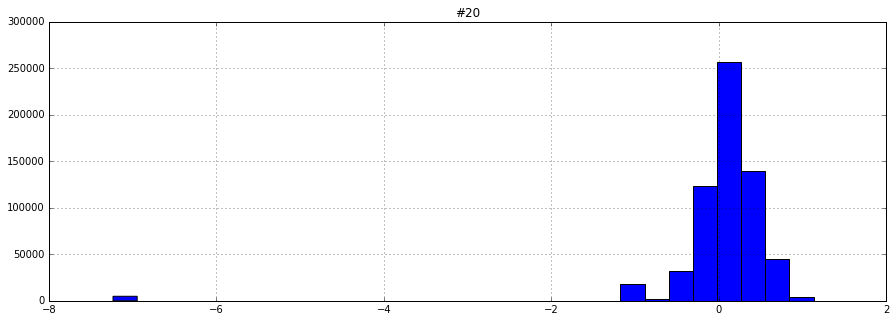

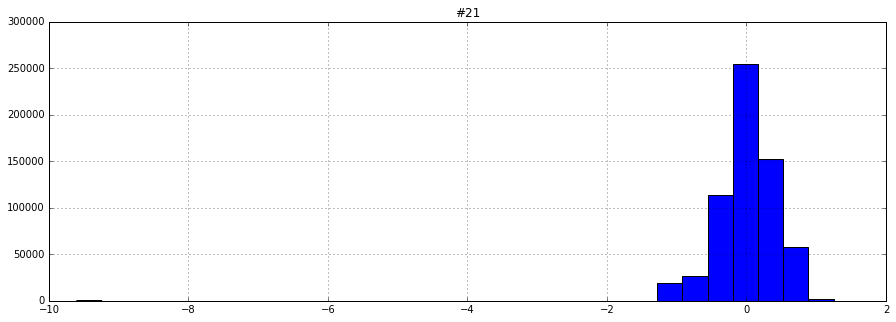

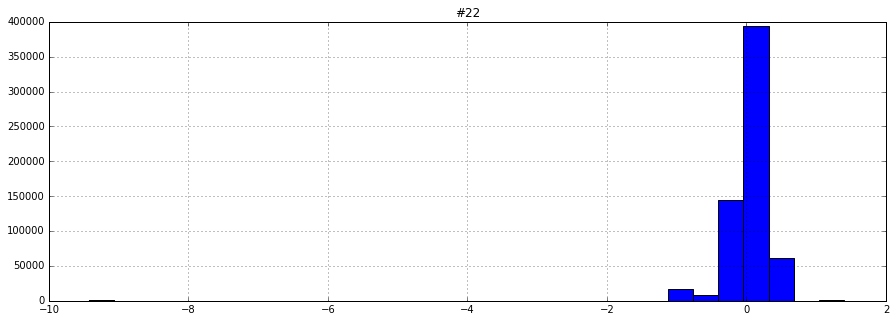

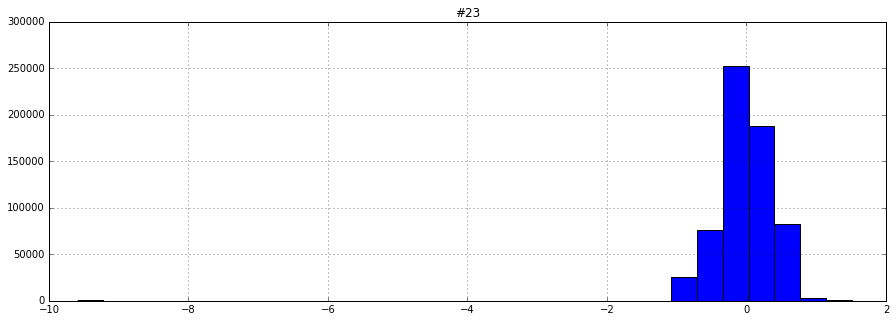

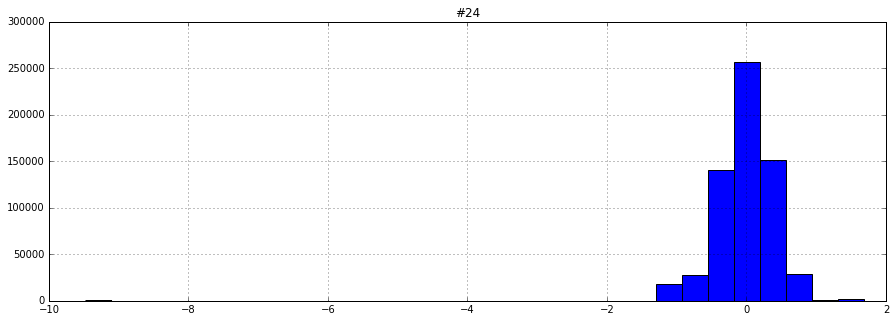

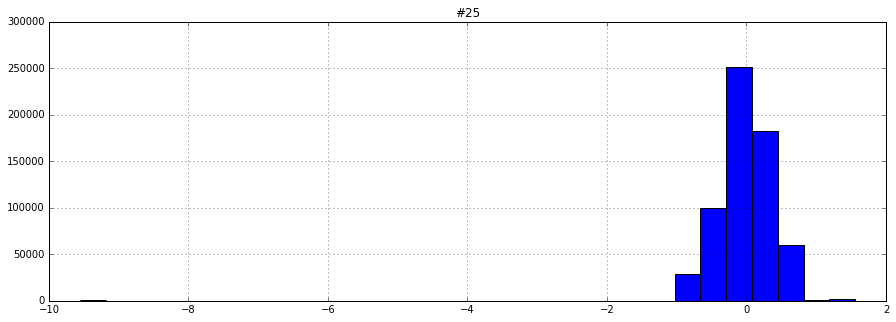

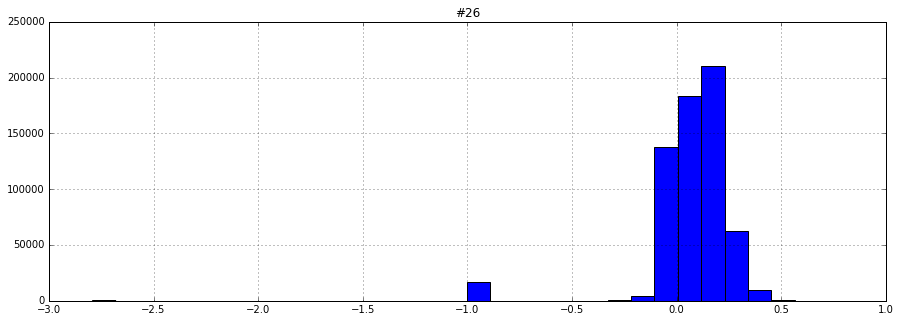

In [13]:
feats = np.concatenate([x['kinect'] for x in X])

for i in range(27):
    plt.figure(figsize=(15, 5))
    print feats[:, :, i].flatten().min(), feats[:, :, i].flatten().max()
    plt.hist(feats[:, :, i].flatten(), bins=30)
    plt.title('#{}'.format(i))
    plt.grid(True)

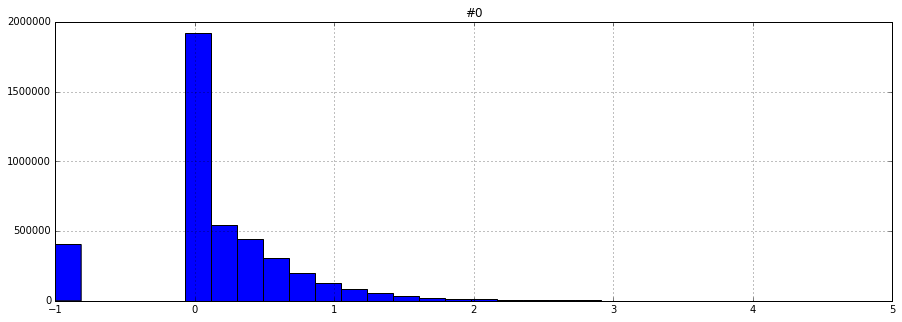

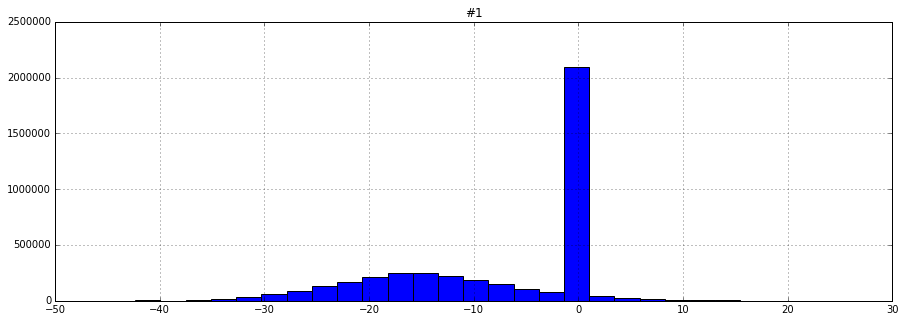

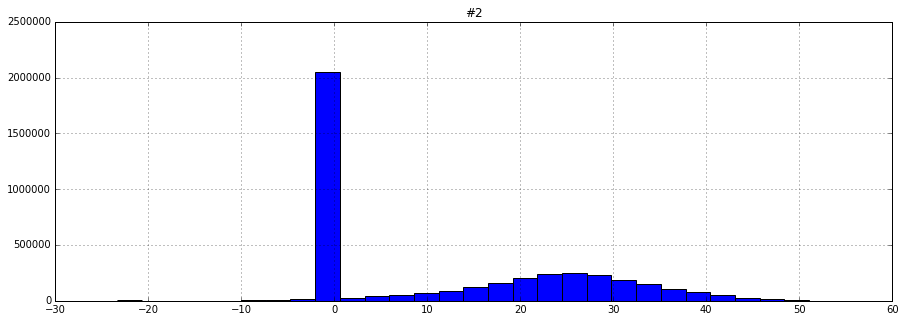

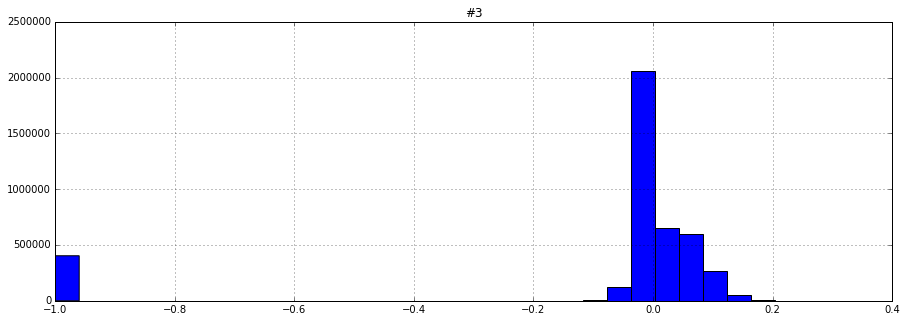

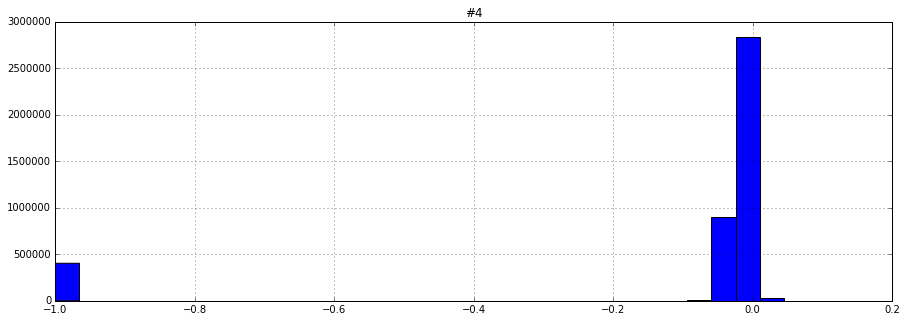

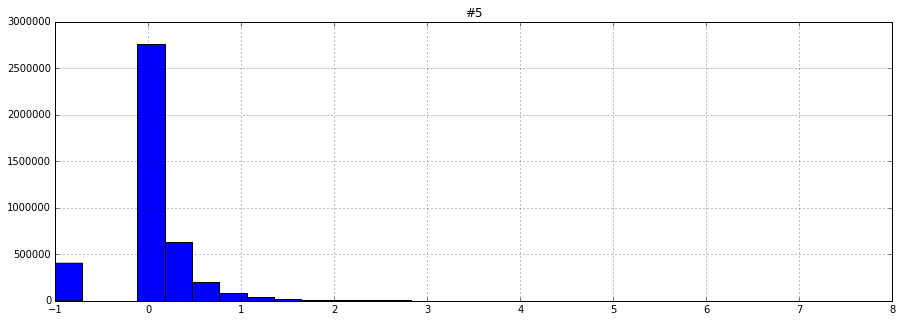

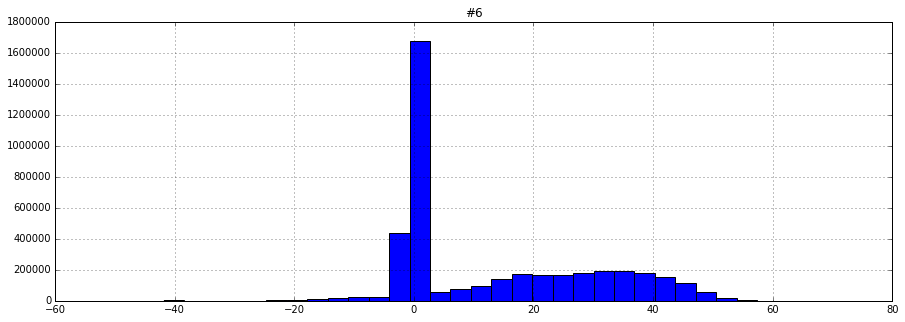

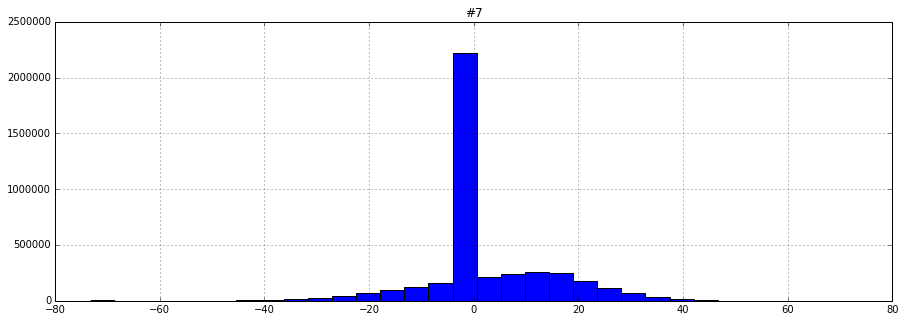

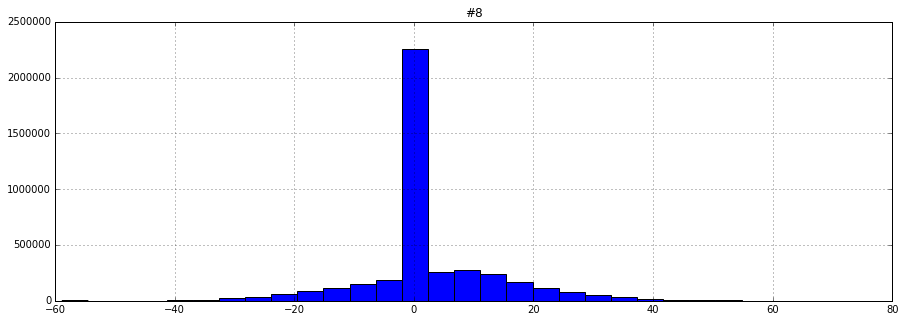

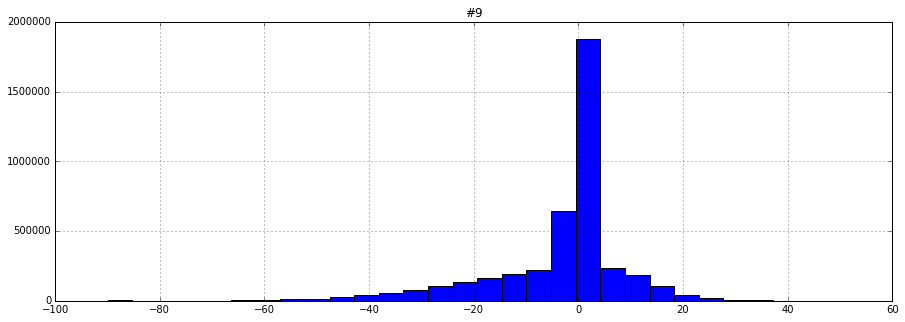

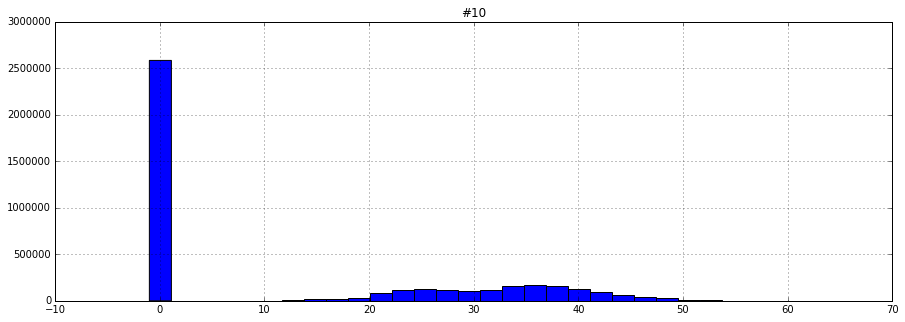

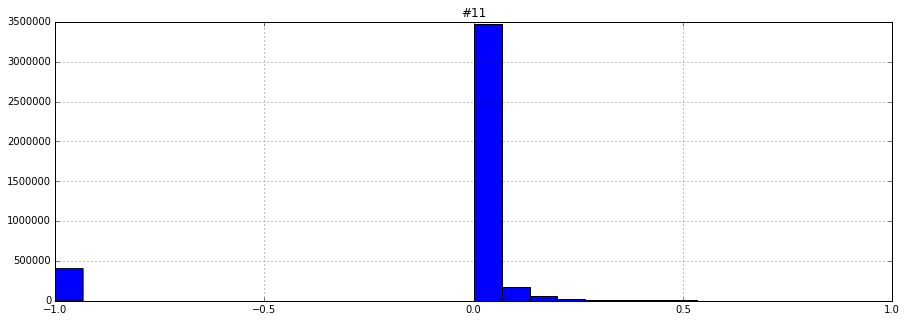

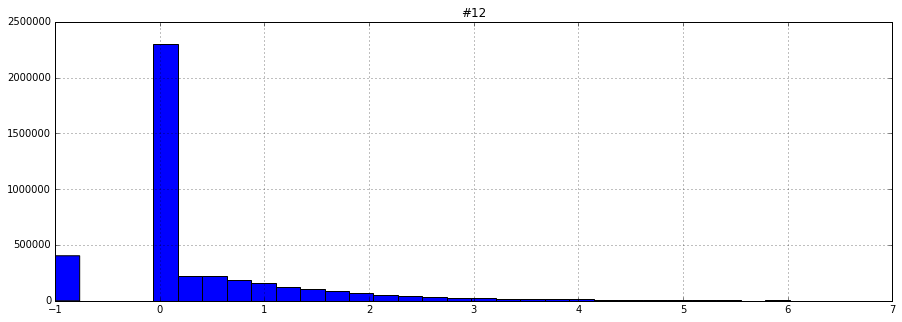

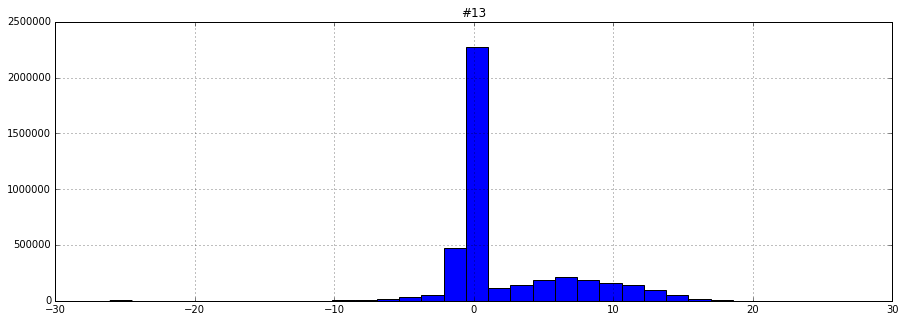

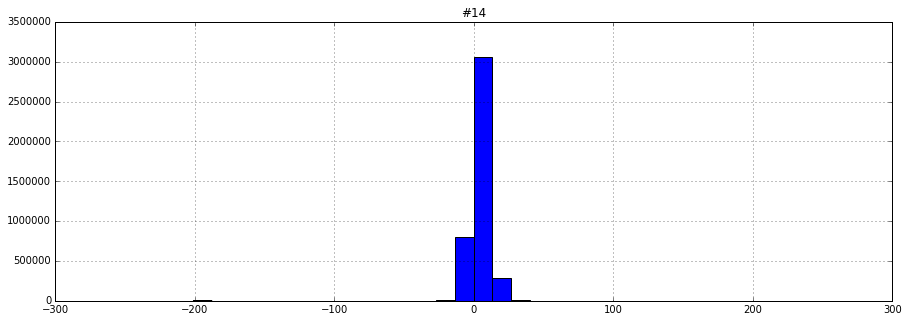

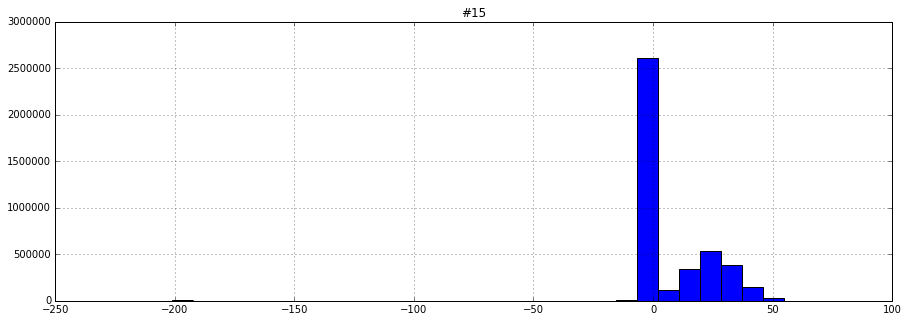

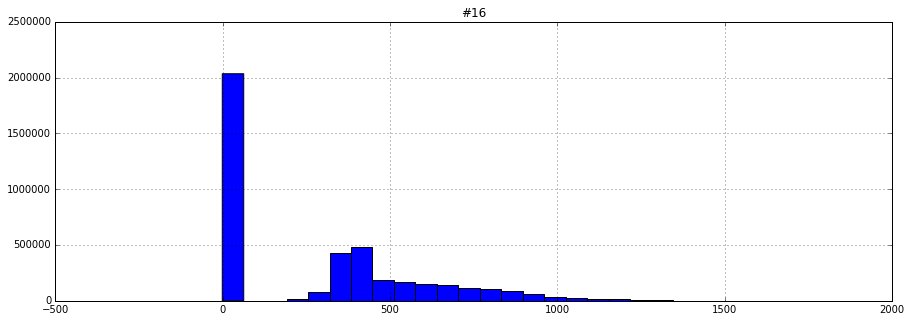

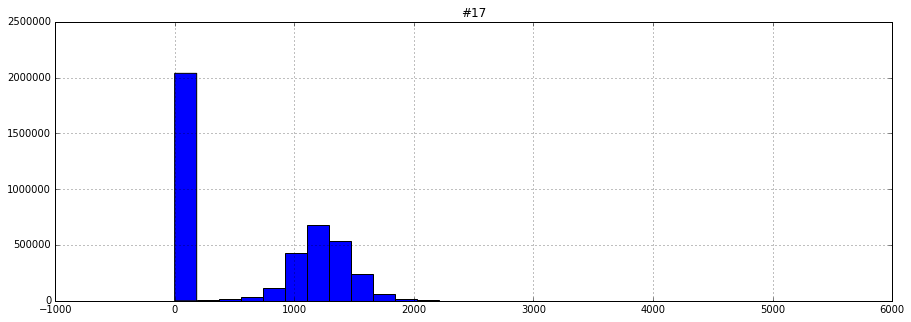

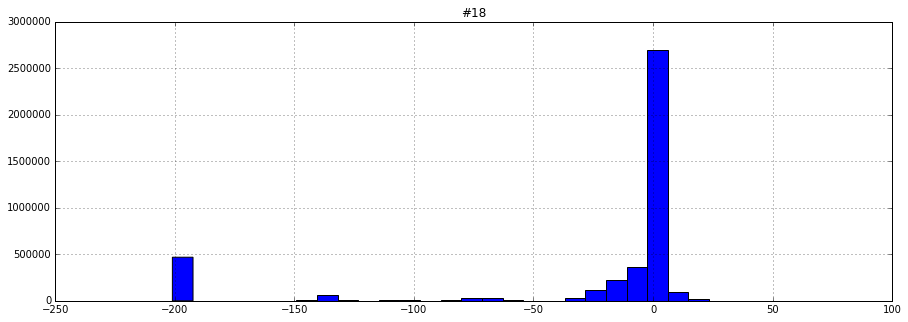

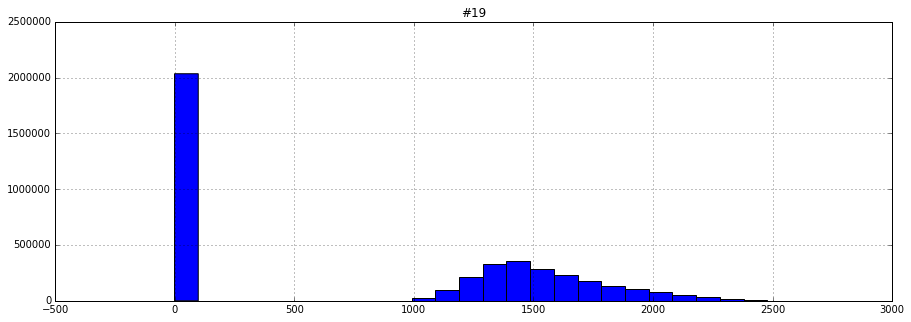

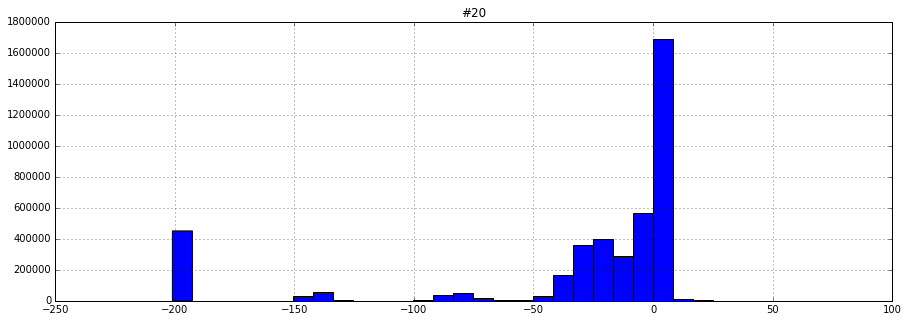

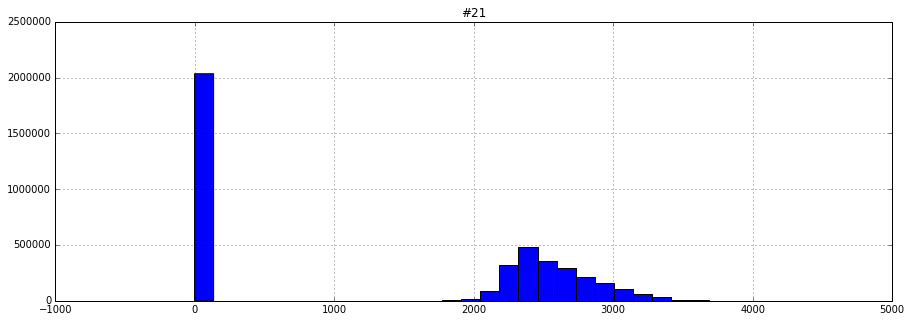

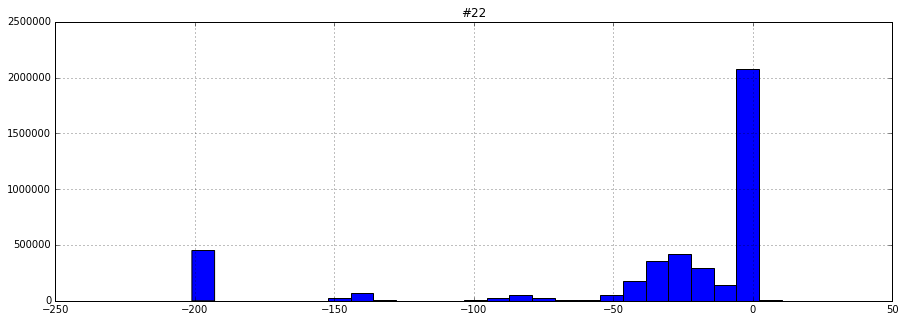

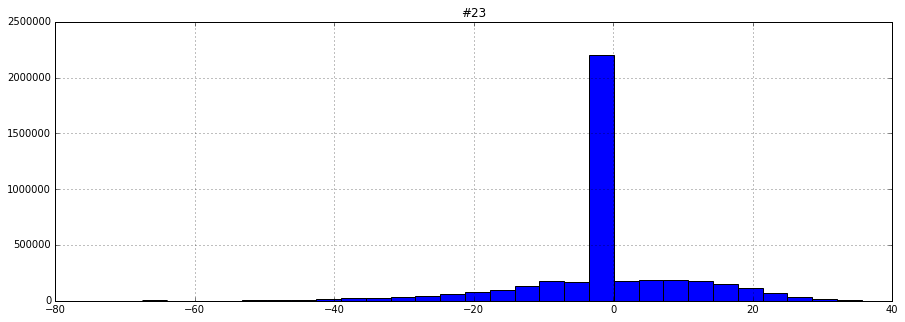

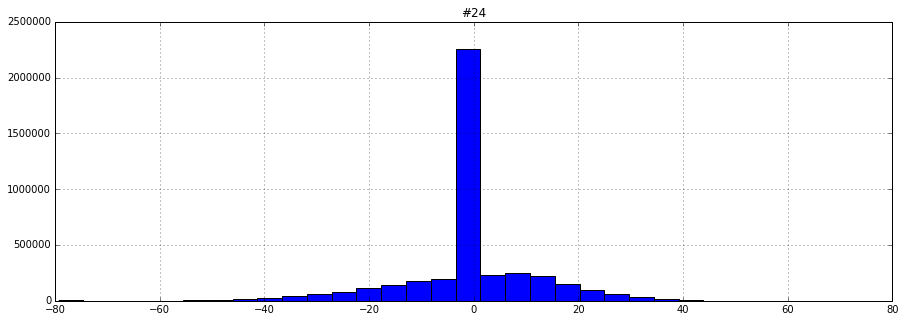

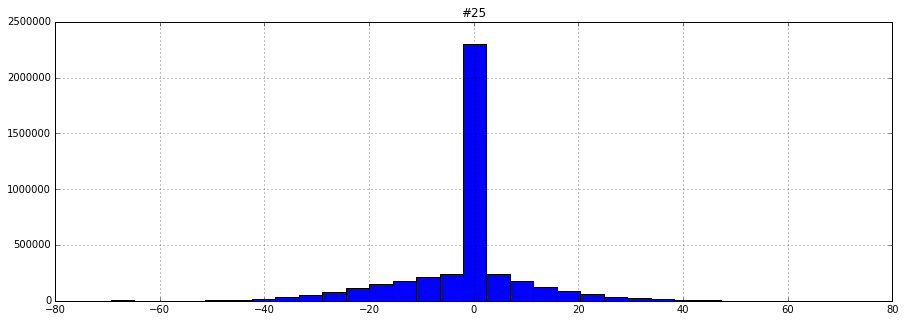

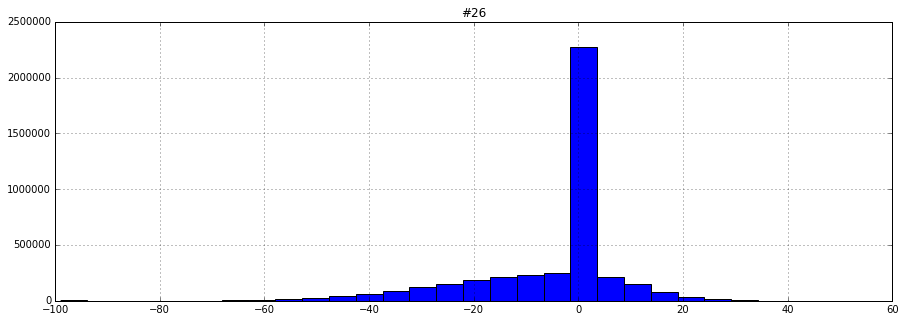

In [14]:
feats = np.concatenate([x['audio'] for x in X])

for i in range(27):
    plt.figure(figsize=(15, 5))
#     print feats[:, :, i].flatten().min(), feats[:, :, i].flatten().max()
    plt.hist(feats[:, :, i].flatten(), bins=30)
    plt.title('#{}'.format(i))
    plt.grid(True)